Imports necessary for this notebook

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, signal
import seaborn as sns

Let's read the data and take a look

In [3]:
dataset_path = '../data/dataset_20221127.csv'
df = pd.read_csv(dataset_path)
df

,state,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,...,t_990,t_991,t_992,t_993,t_994,t_995,t_996,t_997,t_998,t_999
0,0,0.717573,0.714725,0.704585,0.694305,0.687011,0.683188,0.682031,0.682287,0.682855,...,22.574360,22.291788,22.200832,22.117663,21.933806,21.704434,21.518837,21.423986,21.415594,21.471398
1,0,0.719402,0.717330,0.708022,0.698305,0.691041,0.686480,0.683860,0.682345,0.681356,...,21.606304,21.749150,21.913914,22.131298,22.423522,22.622597,22.538945,22.260577,21.968238,21.749753
2,0,0.723090,0.721113,0.711632,0.701274,0.692945,0.687295,0.683872,0.682021,4.548630,...,21.920634,22.191567,22.503530,22.636686,22.477095,22.179683,21.903873,21.712412,21.651748,21.751566
3,0,0.729627,0.726485,0.715613,0.704214,0.695404,0.689836,0.686908,0.685656,0.685570,...,21.762202,21.882131,21.835883,21.622620,21.348106,21.087030,20.890951,20.803209,20.818334,20.924658
4,0,0.714636,0.714388,0.706626,0.698127,0.691818,0.688184,0.686566,0.686016,0.685919,...,22.371510,22.625730,22.591585,22.306095,21.983154,21.734184,21.610245,21.653387,21.830623,21.990501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,0.722422,0.720920,0.712699,0.704530,0.699261,0.697420,0.698031,0.699691,0.701472,...,21.894379,21.584036,21.304952,21.153940,21.151720,21.236818,21.327983,21.391321,21.457854,21.514769
496,2,0.726260,0.726227,0.725950,0.725444,0.724643,0.723600,0.722467,0.721402,0.720516,...,21.156471,21.265720,21.441487,21.636681,21.779605,21.748118,21.535488,21.231456,20.924576,20.711599
497,2,0.726733,0.724837,0.715531,0.705948,0.699105,0.695240,0.693513,0.692998,0.692989,...,20.651314,20.724568,20.833982,21.013726,21.390266,22.054985,22.953415,23.751640,24.014938,23.732403
498,2,0.747386,0.745534,0.735654,0.724924,0.716467,0.710962,0.708025,0.706941,0.706846,...,23.195035,22.725279,22.423966,22.218512,21.978482,21.673394,21.376617,21.186890,21.152177,21.217464


### Split the label column

In [4]:
label_col = df['state'].astype('category')
label_col.describe()

count     500
unique      3
top         0
freq      300
Name: state, dtype: int64

### first remove nan values

we will drop columns as we have way more columns than rows

In [5]:
print(df.isna().sum().sum(), "nan values found!")
no_na_df = df.dropna(axis='columns')
print(no_na_df.isna().sum().sum(), "nan values remaining!")

23 nan values found!
0 nan values remaining!


### remove outliers

In [6]:
features = ['current', 'voltage']
raw_mult_column_df = no_na_df.drop(columns=['state'])
raw_mult_column_df.columns = pd.MultiIndex.from_tuples([(features[c[0] == 't'], c[2:]) for c in raw_mult_column_df.columns])
raw_mult_column_df['state'] = label_col
raw_mult_column_df

current                                                              \
            0         1         2         3         4         6         7   
0    0.717573  0.714725  0.704585  0.694305  0.687011  0.682031  0.682287   
1    0.719402  0.717330  0.708022  0.698305  0.691041  0.683860  0.682345   
2    0.723090  0.721113  0.711632  0.701274  0.692945  0.683872  0.682021   
3    0.729627  0.726485  0.715613  0.704214  0.695404  0.686908  0.685656   
4    0.714636  0.714388  0.706626  0.698127  0.691818  0.686566  0.686016   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.722422  0.720920  0.712699  0.704530  0.699261  0.698031  0.699691   
496  0.726260  0.726227  0.725950  0.725444  0.724643  0.722467  0.721402   
497  0.726733  0.724837  0.715531  0.705948  0.699105  0.693513  0.692998   
498  0.747386  0.745534  0.735654  0.724924  0.716467  0.708025  0.706941   
499  0.740270  0.738251  0.728985  0.719566  0.713096  0.709747  0.710534   

                                   ...    voltage                        \
            8        10        11  ...        989        990        991   
0    0.682855  0.683216  0.683032  ...  23.062557  22.574360  22.291788   
1    0.681356  0.679903  0.679312  ...  21.497333  21.606304  21.749150   
2    4.548630  0.680692  0.680640  ...  21.727318  21.920634  22.191567   
3    0.685570  0.687840  0.689897  ...  21.617143  21.762202  21.882131   
4    0.685919  0.686421  0.686709  ...  22.084112  22.371510  22.625730   
..        ...       ...       ...  ...        ...        ...        ...   
495  0.701472  0.703706  0.703921  ...  22.144916  21.894379  21.584036   
496  0.720516  0.718952  0.718099  ...  21.162605  21.156471  21.265720   
497  0.692989  0.693135  0.693267  ...  20.613039  20.651314  20.724568   
498  0.706846  0.707536  0.708036  ...  23.749450  23.195035  22.725279   
499  0.711457  0.712284  0.712370  ...  21.217264  21.282329  21.380602   

                                                                      state  
           992        993        995        996        997        998        
0    22.200832  22.117663  21.704434  21.518837  21.423986  21.415594     0  
1    21.913914  22.131298  22.622597  22.538945  22.260577  21.968238     0  
2    22.503530  22.636686  22.179683  21.903873  21.712412  21.651748     0  
3    21.835883  21.622620  21.087030  20.890951  20.803209  20.818334     0  
4    22.591585  22.306095  21.734184  21.610245  21.653387  21.830623     0  
..         ...        ...        ...        ...        ...        ...   ...  
495  21.304952  21.153940  21.236818  21.327983  21.391321  21.457854     2  
496  21.441487  21.636681  21.748118  21.535488  21.231456  20.924576     2  
497  20.833982  21.013726  22.054985  22.953415  23.751640  24.014938     2  
498  22.423966  22.218512  21.673394  21.376617  21.186890  21.152177     2  
499  21.530959  21.761810  22.371326  22.756440  23.145252  23.237961     2  

[500 rows x 1978 columns]

In [7]:
raw_tall_df = raw_mult_column_df.melt(id_vars=['state'], ignore_index=False, var_name=['feature', 'col'])
raw_tall_df = raw_tall_df.reset_index(names=['lin'])
raw_tall_df

,lin,state,feature,col,value
0,0,0,current,0,0.717573
1,1,0,current,0,0.719402
2,2,0,current,0,0.723090
3,3,0,current,0,0.729627
4,4,0,current,0,0.714636
...,...,...,...,...,...
988495,495,2,voltage,998,21.457854
988496,496,2,voltage,998,20.924576
988497,497,2,voltage,998,24.014938
988498,498,2,voltage,998,21.152177


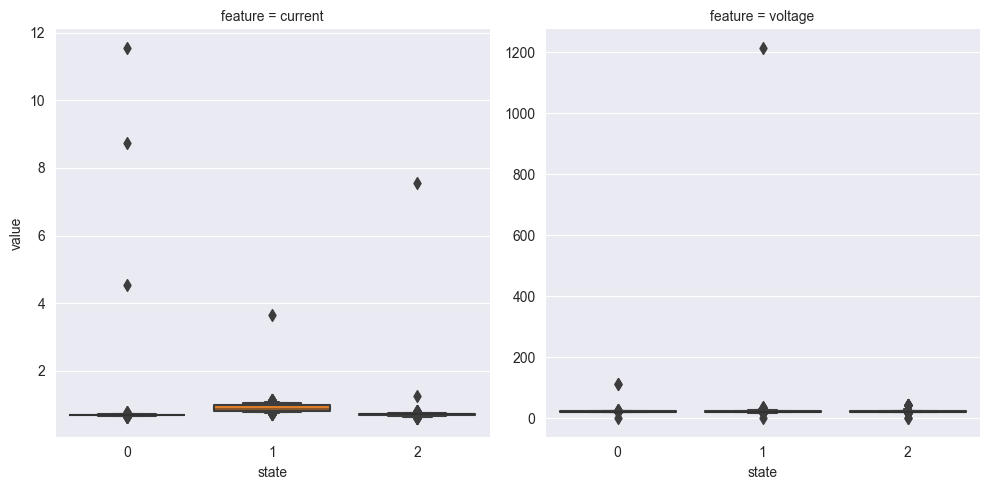

In [8]:
sns.catplot(data=raw_tall_df, x='state', y='value', col='feature', kind='boxen', sharey=False)

In [48]:
current_df = raw_mult_column_df['current']
voltage_df = raw_mult_column_df['voltage']

In [49]:
ZSCORE_THRESHOLD = 5
current_selection = (np.abs(stats.zscore(current_df)) < ZSCORE_THRESHOLD).all()
current_df = current_df.loc[:, current_selection]
current_df.melt().describe()

,value
count,490500.000000
mean,0.731947
std,0.093662
min,0.595338
25%,0.680155
50%,0.700808
75%,0.730541
max,1.257879


In [50]:
voltage_selection = (np.abs(stats.zscore(voltage_df)) < ZSCORE_THRESHOLD).all()
voltage_df = voltage_df.loc[:, voltage_selection]
voltage_df.melt().describe()

,value
count,365500.000000
mean,21.859314
std,1.614380
min,17.486198
25%,21.073538
50%,21.713332
75%,22.492213
max,42.831231


In [51]:
mult_column_df = pd.concat([current_df, voltage_df], axis=1, keys=features)
mult_column_df['state'] = label_col
tall_df = mult_column_df.melt(id_vars=['state'], ignore_index=False, var_name=['feature', 'col'])
tall_df = tall_df.reset_index(names=['lin'])
tall_df

,lin,state,feature,col,value
0,0,0,current,0,0.717573
1,1,0,current,0,0.719402
2,2,0,current,0,0.723090
3,3,0,current,0,0.729627
4,4,0,current,0,0.714636
...,...,...,...,...,...
855995,495,2,voltage,998,21.457854
855996,496,2,voltage,998,20.924576
855997,497,2,voltage,998,24.014938
855998,498,2,voltage,998,21.152177


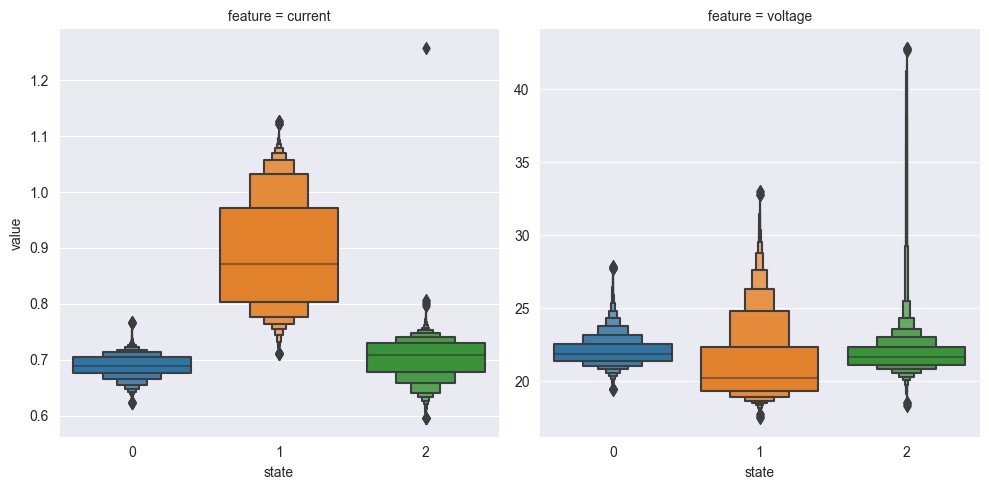

In [52]:
sns.catplot(data=tall_df, x='state', y='value', col='feature', kind='boxen', sharey=False)

#### Reduce input variables quantity

taking a look on some samples

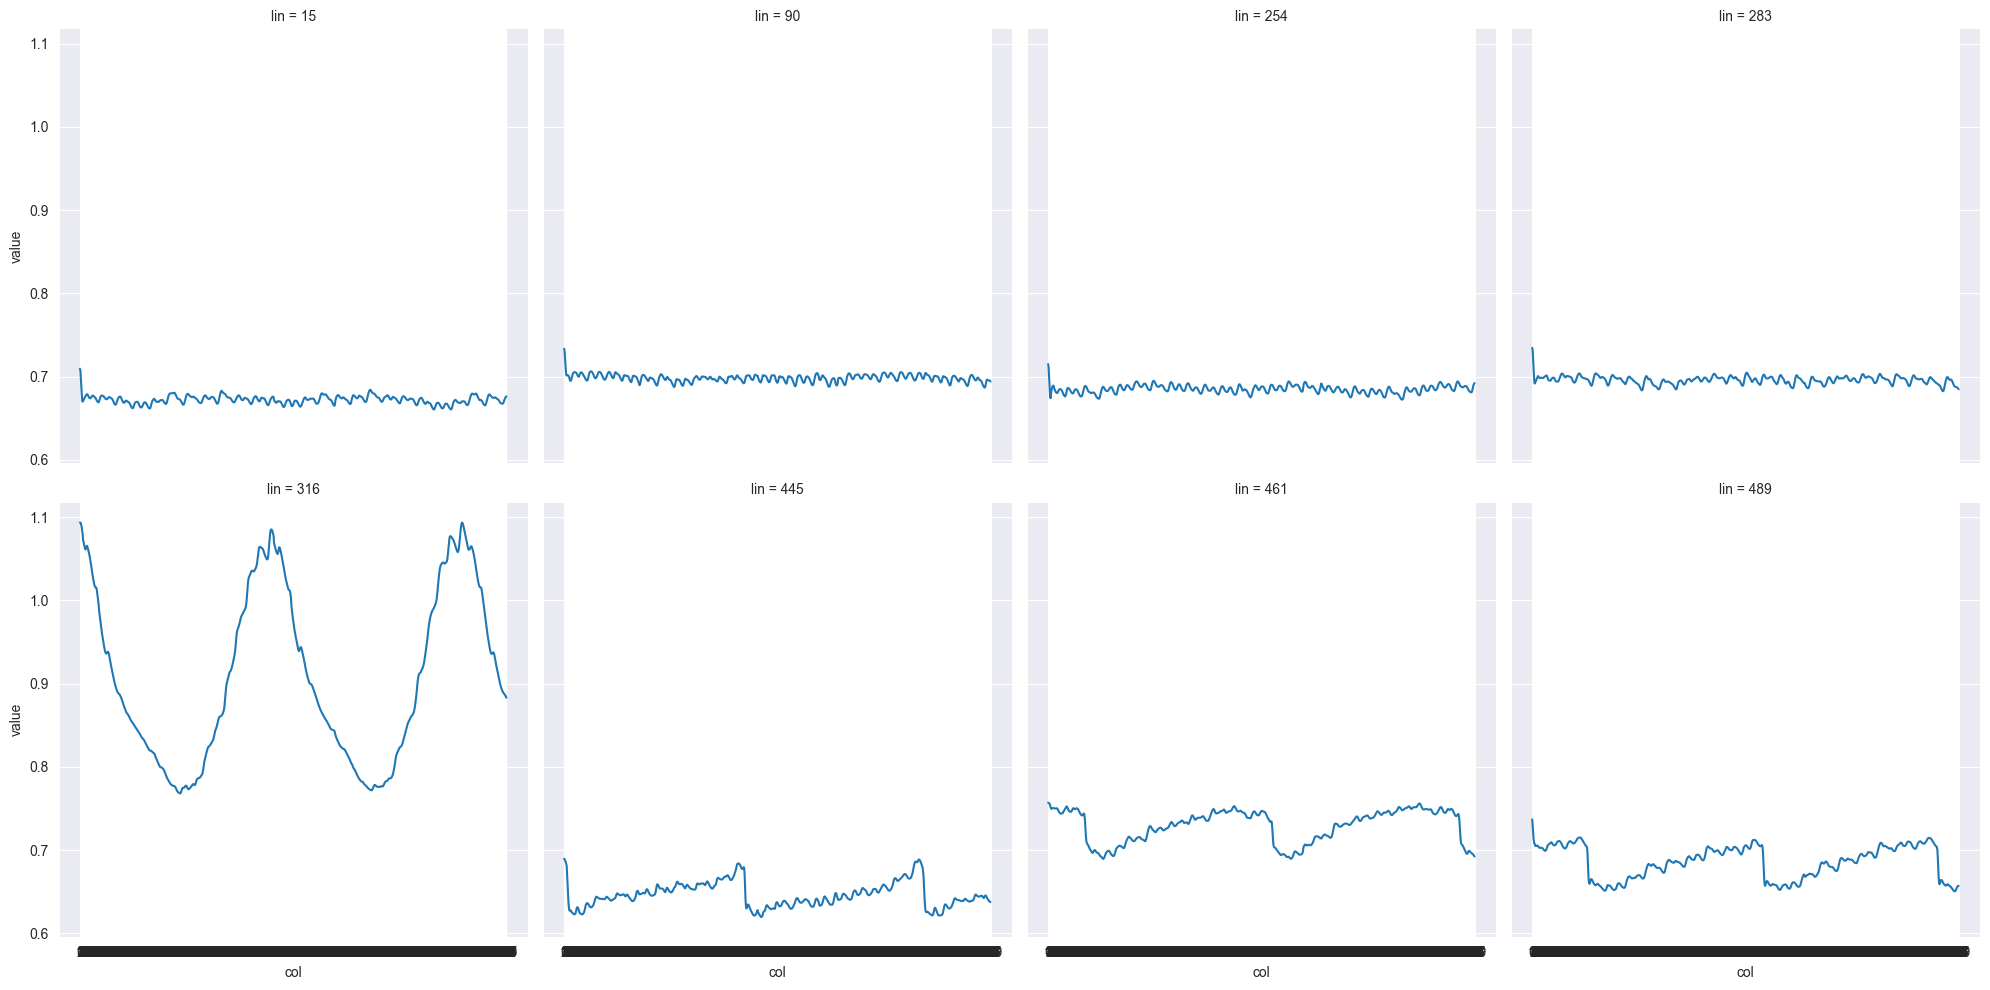

In [53]:
def get_samples(to_sample_df):
    sample_df = to_sample_df.sample(n=8, random_state=0)
    sample_df = sample_df.melt(ignore_index=False, var_name='col')
    sample_df = sample_df.reset_index(names=['lin'])
    return sample_df
current_sample_df = get_samples(current_df)
sns.relplot(data=current_sample_df, x='col', y='value', col='lin', col_wrap=4, kind='line')

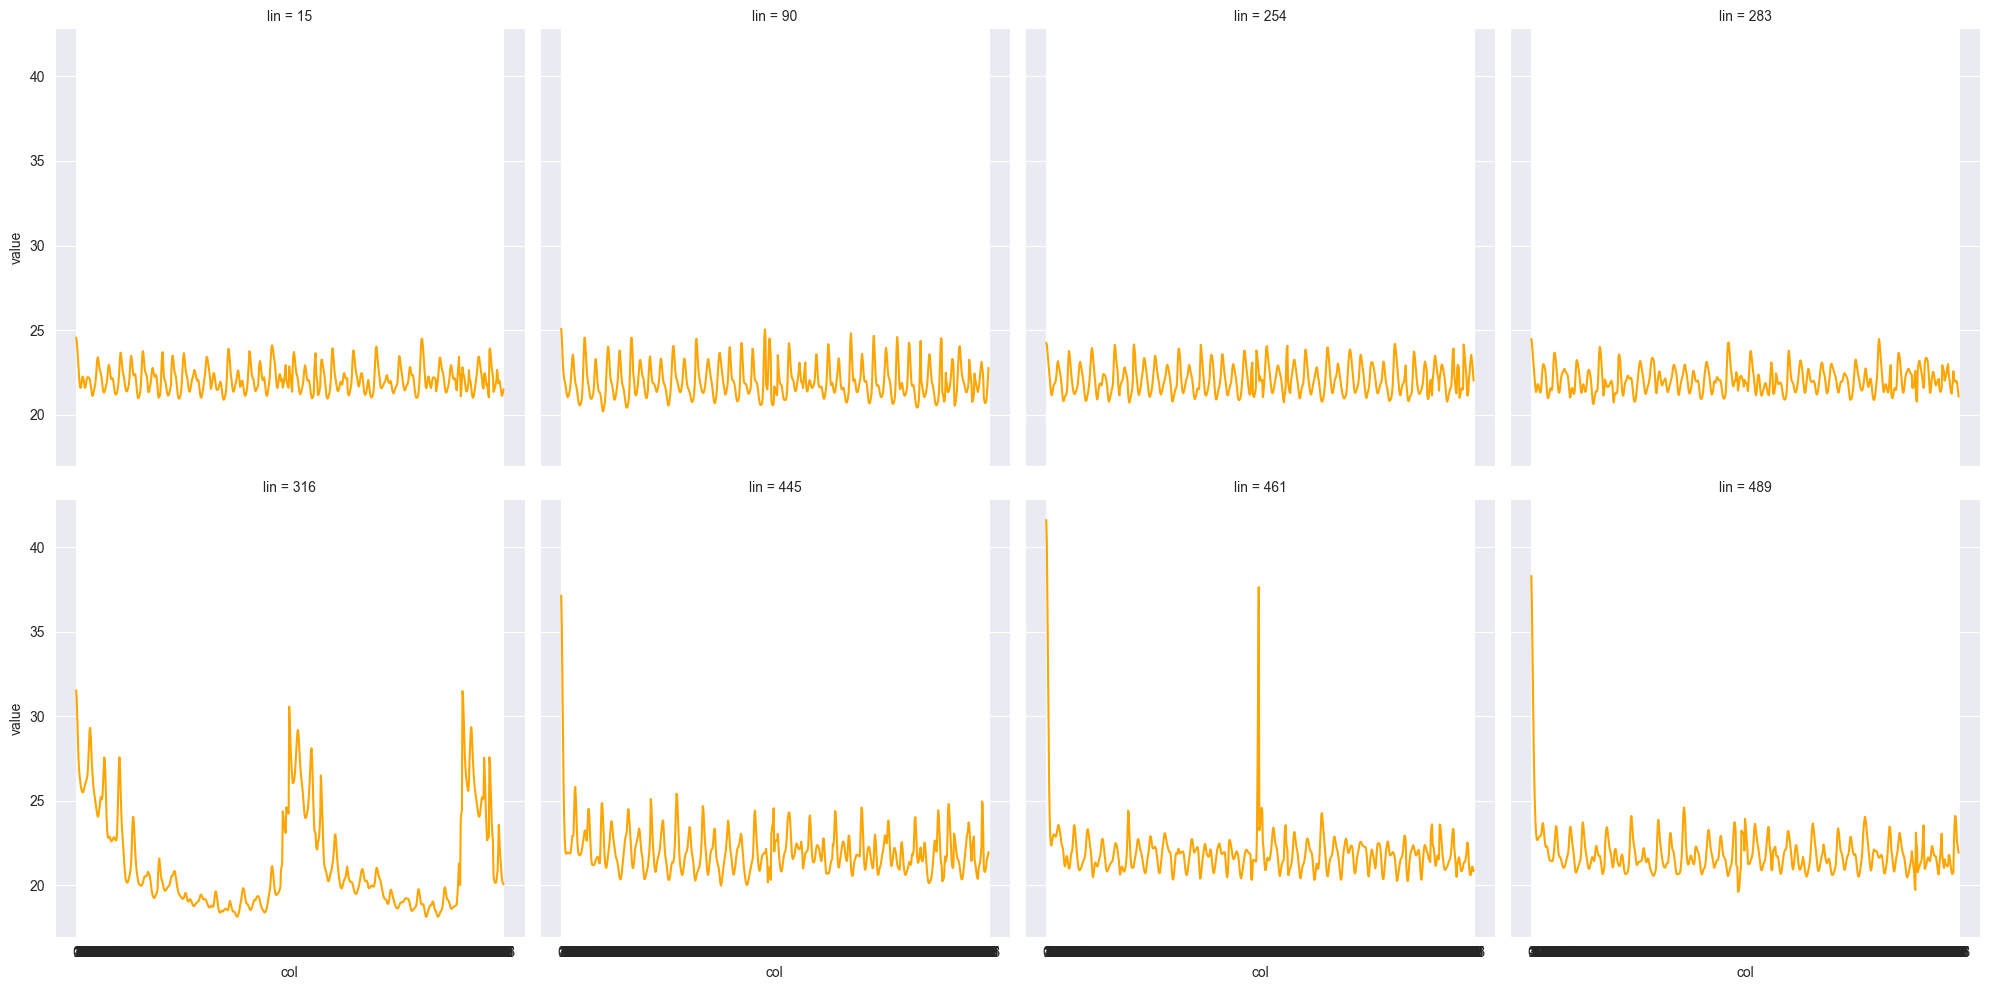

In [54]:
sns.relplot(data=get_samples(voltage_df), x='col', y='value', col='lin', col_wrap=4, kind='line', color='orange')

### smooth the signal

In [55]:
current_df_t = current_df.transpose()
current_smooth_df = pd.DataFrame([signal.savgol_filter(current_df_t[col], 51, 3) for col in current_df_t.columns])
current_smooth_df.columns = current_df.columns
current_smooth_df.melt().describe()

,value
count,490500.000000
mean,0.731936
std,0.093573
min,0.595865
25%,0.680193
50%,0.700867
75%,0.730101
max,1.110483


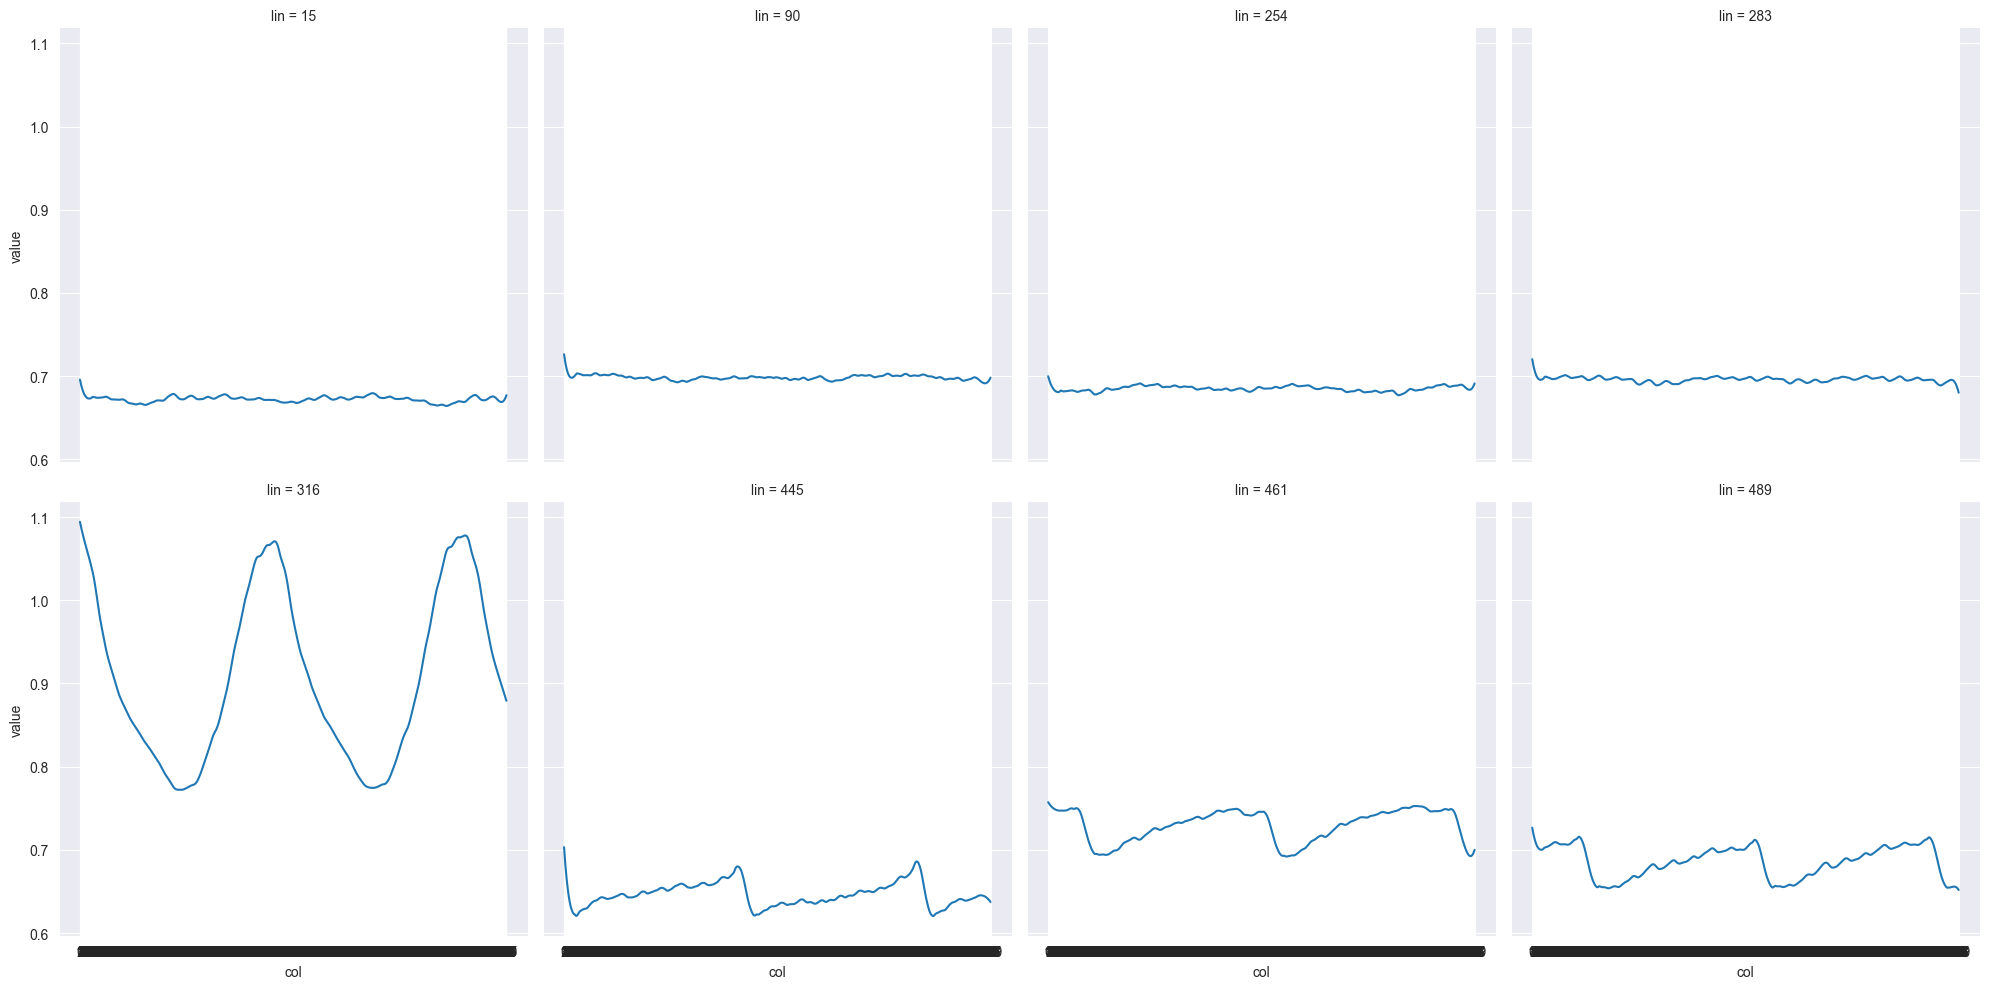

In [56]:
sns.relplot(data=get_samples(current_smooth_df), x='col', y='value', col='lin', col_wrap=4, kind='line')

In [57]:
voltage_df_t = voltage_df.transpose()
voltage_smooth_df = pd.DataFrame([signal.savgol_filter(voltage_df_t[col], 51, 3) for col in voltage_df_t.columns])
voltage_smooth_df.columns = voltage_df.columns
voltage_smooth_df.melt().describe()

,value
count,365500.000000
mean,21.856238
std,1.265079
min,17.860314
25%,21.669720
50%,21.952813
75%,22.165641
max,38.126514


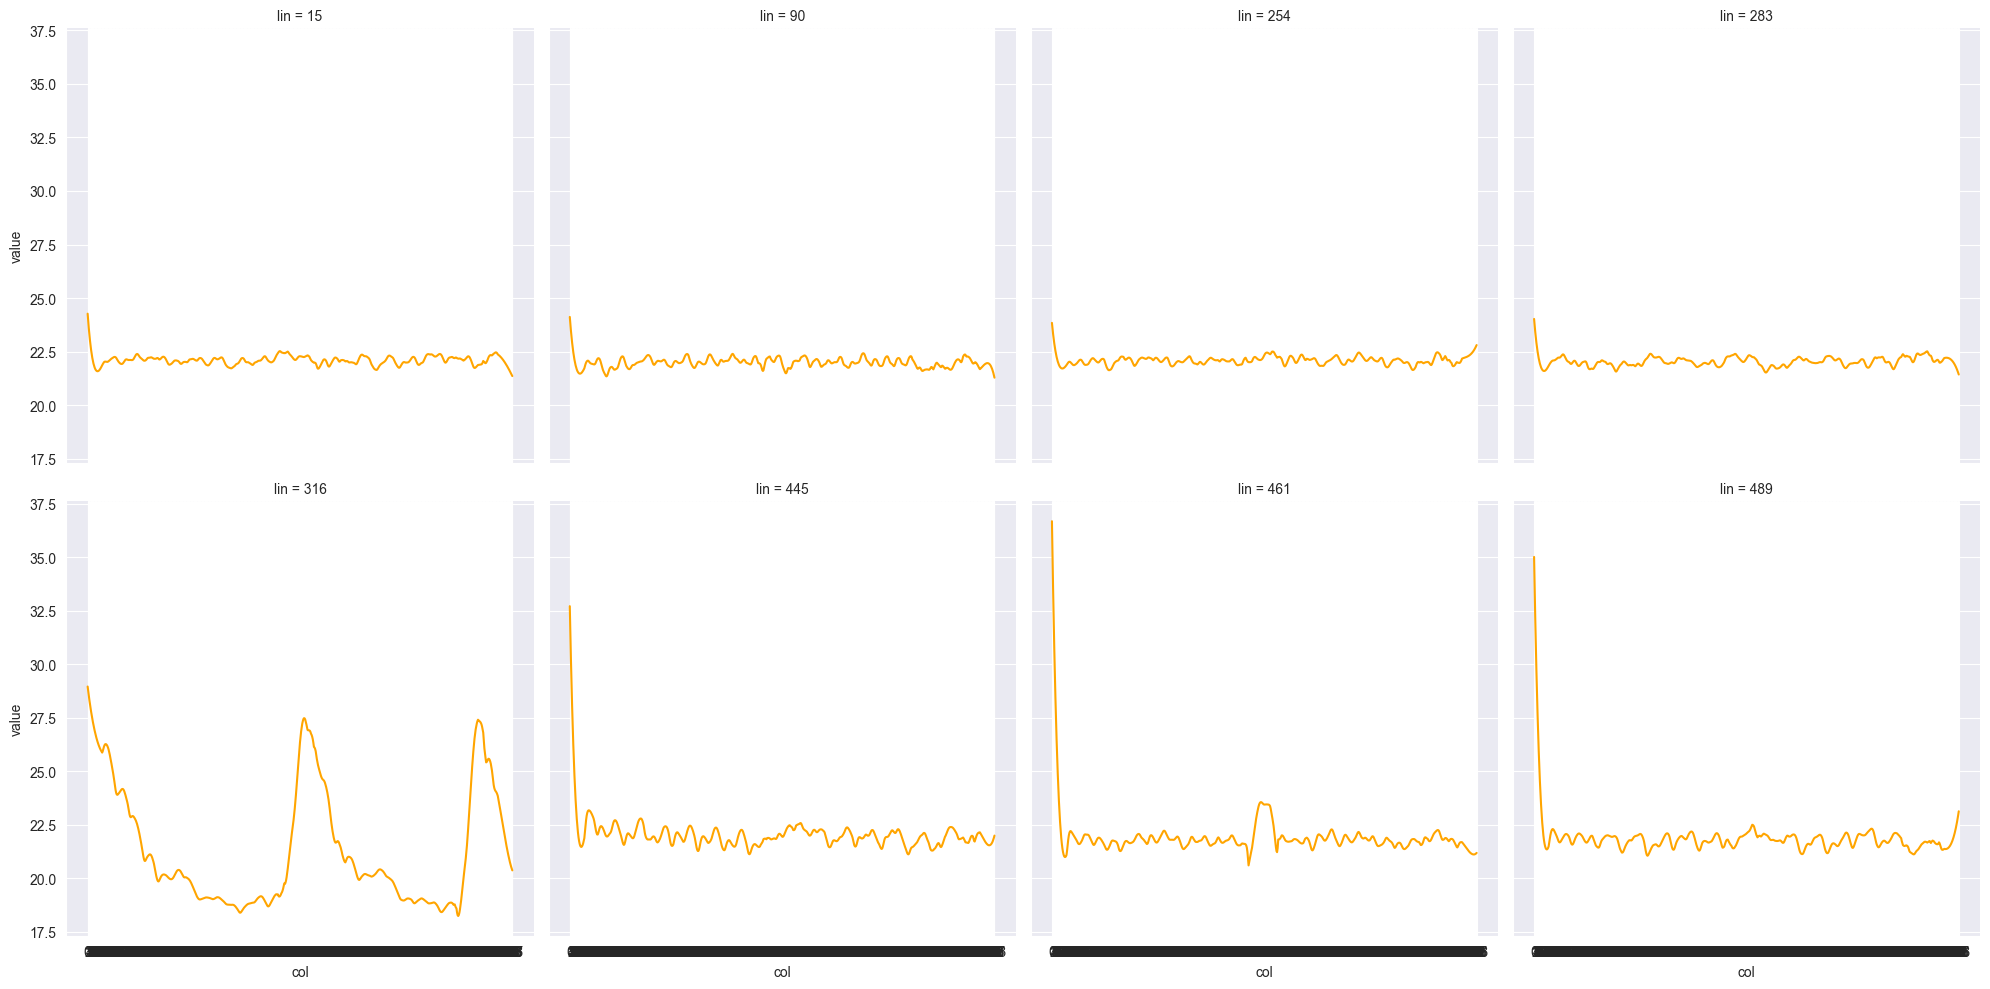

In [58]:
sns.relplot(data=get_samples(voltage_smooth_df), x='col', y='value', col='lin', col_wrap=4, kind='line', color='orange')

### get only some columns

In [59]:
columns = current_smooth_df.columns
columns = np.linspace(0, columns.shape[0]-1, num=100, dtype=int)
columns = current_smooth_df.columns[columns]
current_data_df = current_smooth_df.loc[:, columns]
current_data_df.columns = np.arange(current_data_df.shape[1])
current_data_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.707154,0.684803,0.677227,0.679914,0.679026,0.677631,0.679466,0.680843,0.681122,0.680282,...,0.680196,0.681960,0.681789,0.680348,0.684297,0.687010,0.686745,0.681797,0.681911,0.694380
1,0.712894,0.681797,0.673658,0.679394,0.680926,0.678145,0.677945,0.679775,0.680638,0.678671,...,0.680126,0.680136,0.678038,0.678363,0.678275,0.677930,0.675556,0.676279,0.676578,0.674539
2,0.709749,0.690045,0.683148,0.685040,0.683997,0.683948,0.684935,0.683803,0.683620,0.685512,...,0.688420,0.685288,0.685640,0.687807,0.690024,0.687650,0.689767,0.693735,0.695019,0.687035
3,0.710863,0.700581,0.695553,0.696035,0.693665,0.694304,0.695297,0.692737,0.692585,0.692767,...,0.689226,0.689742,0.688370,0.690565,0.692586,0.694033,0.691937,0.693587,0.696882,0.701314
4,0.710102,0.687476,0.678118,0.679288,0.681466,0.682072,0.679834,0.680356,0.682960,0.683387,...,0.679650,0.681104,0.679486,0.677816,0.677443,0.677651,0.674996,0.672007,0.671800,0.675878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.713196,0.703623,0.697860,0.697521,0.698474,0.700126,0.702560,0.699977,0.700782,0.700608,...,0.699323,0.701737,0.706570,0.710227,0.700359,0.678757,0.661498,0.655834,0.656011,0.648643
496,0.738802,0.706543,0.683207,0.669193,0.666703,0.666250,0.665086,0.667153,0.666703,0.668554,...,0.665870,0.664986,0.667720,0.671202,0.675066,0.677970,0.676838,0.680988,0.687255,0.696591
497,0.718529,0.695175,0.689995,0.696398,0.700569,0.698692,0.701092,0.705341,0.709772,0.708594,...,0.709351,0.706575,0.705063,0.706847,0.709776,0.711834,0.709462,0.708985,0.710073,0.715554
498,0.736603,0.713676,0.705705,0.708659,0.709954,0.715179,0.718827,0.708922,0.687169,0.667638,...,0.676233,0.660838,0.657371,0.656789,0.655998,0.656770,0.657977,0.657600,0.660600,0.667104


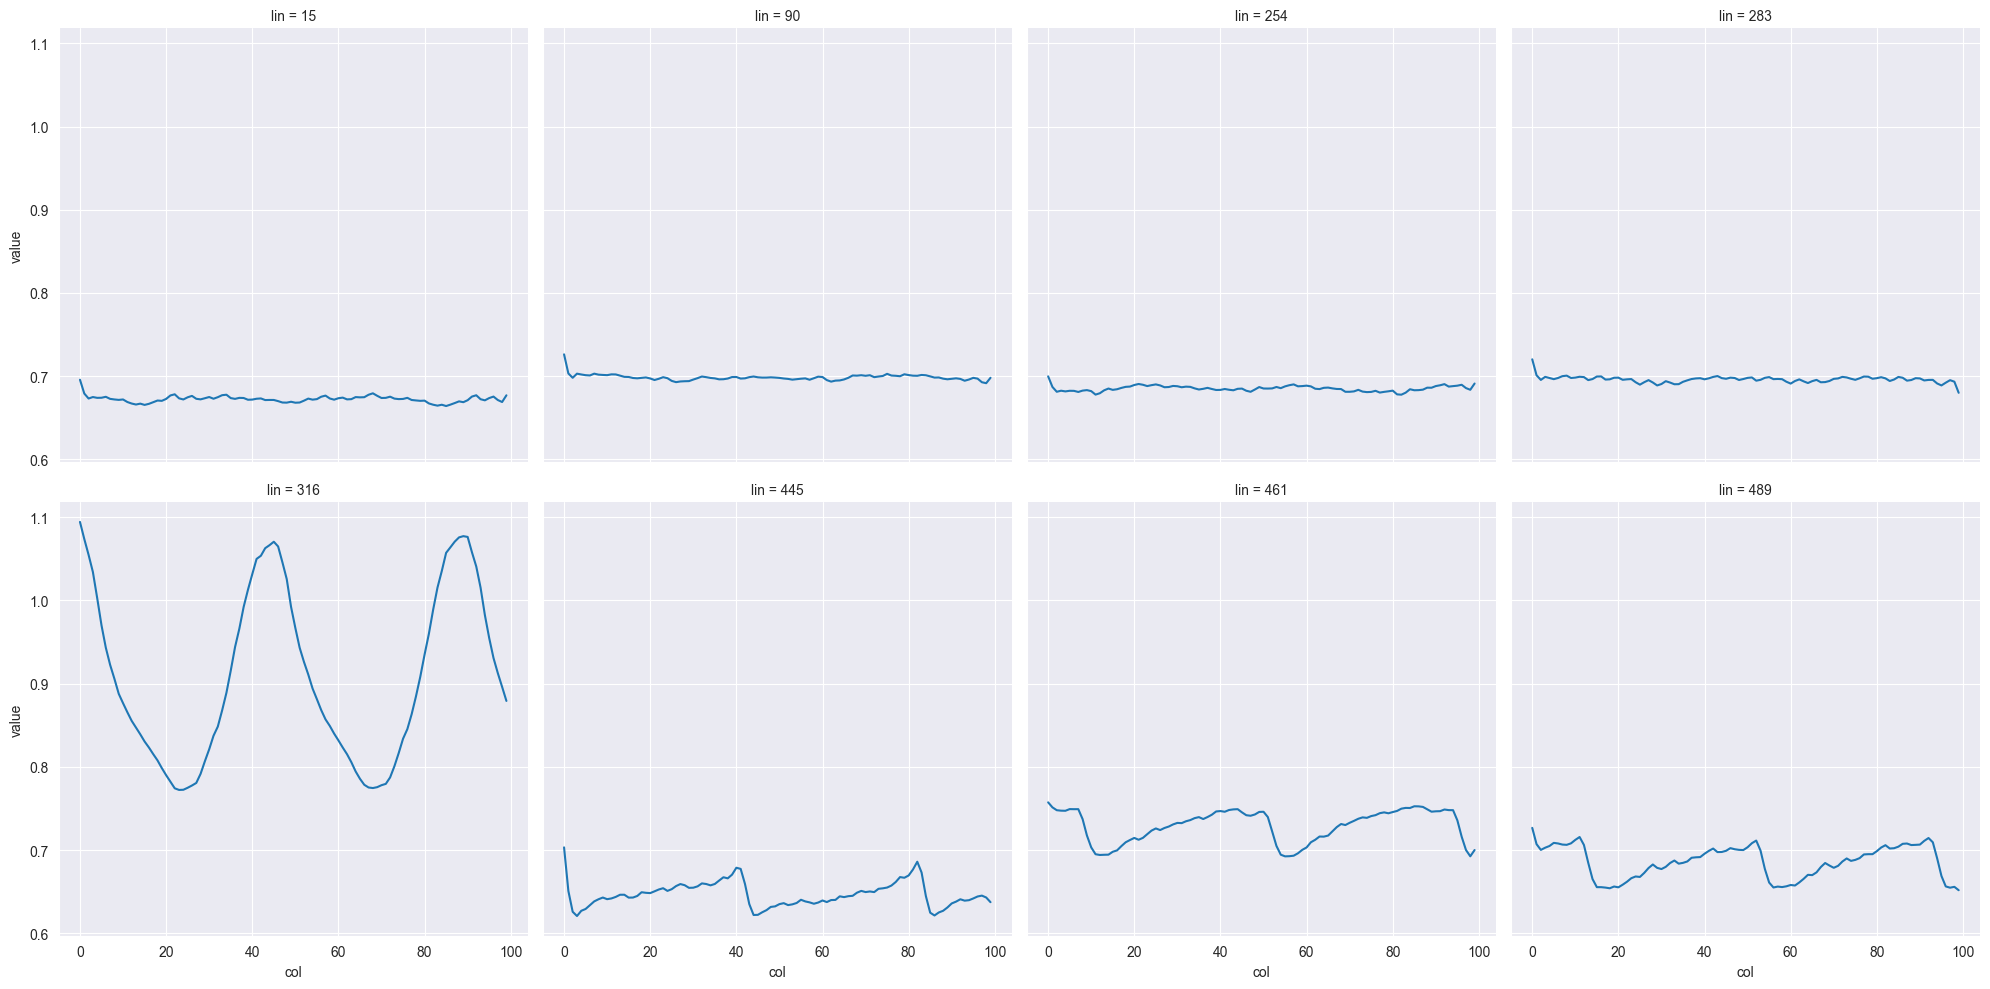

In [60]:
sns.relplot(data=get_samples(current_data_df), x='col', y='value', col='lin', col_wrap=4, kind='line')

In [61]:
columns = voltage_smooth_df.columns
columns = np.linspace(0, columns.shape[0]-1, num=100, dtype=int)
columns = voltage_smooth_df.columns[columns]
voltage_data_df = voltage_smooth_df.loc[:, columns]
voltage_data_df.columns = np.arange(voltage_data_df.shape[1])
voltage_data_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,24.508438,22.302349,21.424914,21.477664,21.882655,21.959226,22.068010,22.077922,21.850407,22.061062,...,21.895350,22.002142,21.931648,21.937355,22.054028,21.803588,21.766714,21.672150,21.721748,22.026490
1,24.389963,22.325219,21.520897,21.592730,21.965551,21.995755,22.132780,22.089210,21.879872,22.091716,...,22.083186,22.140052,22.042175,22.207721,21.791440,21.985079,22.088513,22.261066,22.287847,22.046464
2,24.169157,22.293608,21.577127,21.662890,22.000878,22.019292,22.169888,22.104410,21.918054,22.133336,...,22.382910,22.176254,22.146141,22.178123,21.723604,21.856095,22.052250,22.189179,22.174667,21.896017
3,24.272538,22.323191,21.537755,21.569398,21.962132,21.936576,22.082215,22.174393,21.853032,22.011688,...,21.603433,21.756224,21.843481,21.919572,22.179815,22.335966,22.245887,22.074252,21.699998,20.914481
4,24.349213,22.395084,21.621702,21.667813,22.003777,22.009771,22.184744,22.139961,21.903059,22.116036,...,22.503392,22.139547,22.150481,22.098027,21.723578,21.773743,21.971177,22.046268,22.053767,21.960269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,36.147525,27.151580,22.628507,21.250901,22.079708,22.164082,21.668581,21.974196,22.045316,21.627148,...,21.819021,21.682719,21.912967,21.612552,21.788355,21.628875,21.774209,21.782846,21.705632,21.482808
496,35.913462,27.169516,22.724098,21.304906,22.055083,22.170779,21.677442,21.885516,22.047424,21.564436,...,22.054758,22.170282,22.186664,21.868782,21.790462,21.753246,21.717599,21.906498,21.721739,20.752930
497,35.218760,26.874722,22.655953,21.339971,22.103443,22.163262,21.687300,21.941683,22.055930,21.588987,...,21.434167,21.548905,21.482351,21.539871,21.714687,21.842284,21.483070,21.273787,21.550856,22.768199
498,35.513235,26.976976,22.675583,21.348995,22.108728,22.152120,21.686927,21.986183,22.039164,21.600774,...,21.770187,21.910355,21.979480,21.838078,21.710078,21.514343,21.517470,21.551892,21.657532,21.871597


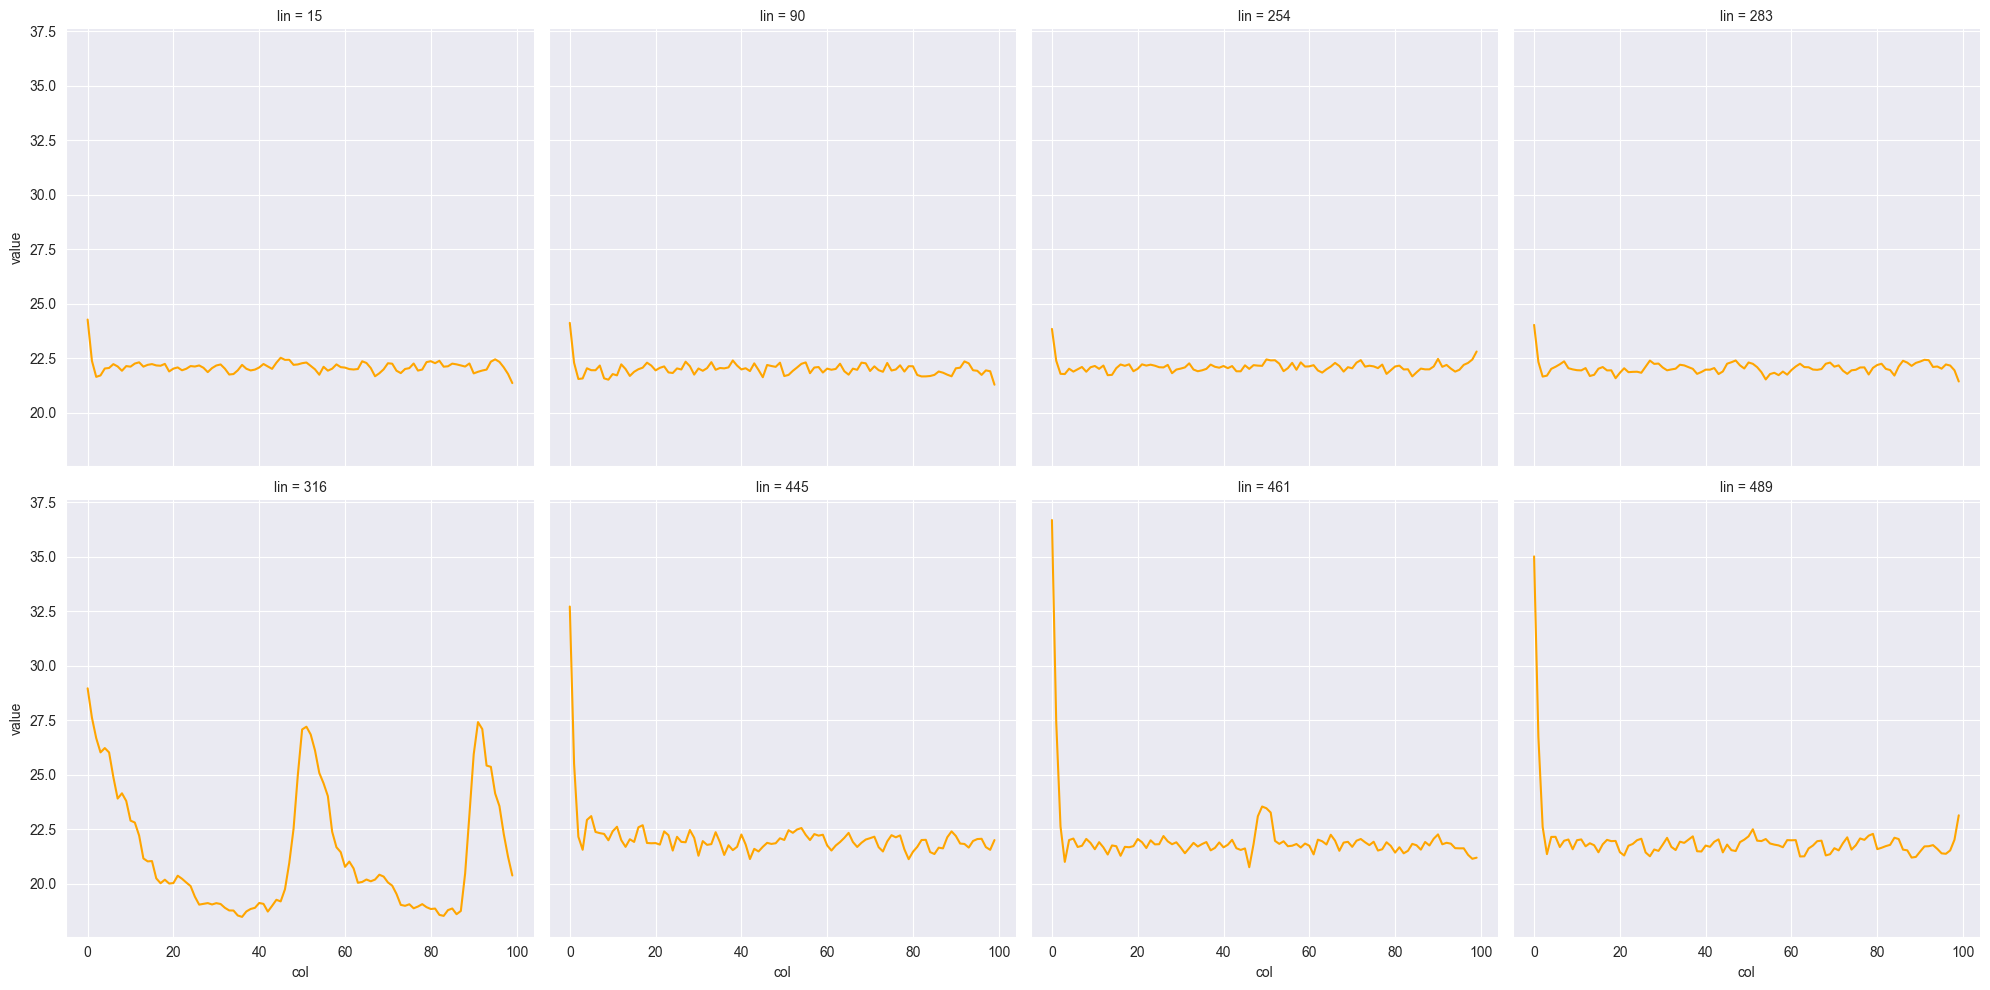

In [62]:
sns.relplot(data=get_samples(voltage_data_df), x='col', y='value', col='lin', col_wrap=4, kind='line', color='orange')

### Data Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
current_data_scaled = scaler.fit_transform(current_data_df)
voltage_data_scaled = scaler.fit_transform(voltage_data_df)
data = np.concatenate([current_data_scaled, voltage_data_scaled], axis=1)
data_df = pd.DataFrame(data)
data_df['label'] = label_col
data_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.121798,0.121870,0.153993,0.169253,0.155802,0.148818,0.146646,0.150738,0.153579,0.161246,...,0.193925,0.251734,0.252745,0.235749,0.234388,0.266014,0.366758,0.454926,0.605216,0
1,0.134298,0.115477,0.146555,0.168157,0.159862,0.149923,0.143226,0.148180,0.152350,0.156897,...,0.211501,0.264518,0.289717,0.199766,0.261106,0.318811,0.461673,0.554504,0.608969,0
2,0.127448,0.133019,0.166331,0.180048,0.166423,0.162400,0.158943,0.157832,0.159913,0.175366,...,0.216115,0.276544,0.285670,0.190471,0.242117,0.312861,0.450087,0.534595,0.580700,0
3,0.129875,0.155427,0.192182,0.203205,0.187080,0.184666,0.182239,0.179240,0.182653,0.194953,...,0.162584,0.241536,0.250314,0.252985,0.312760,0.344631,0.431564,0.451100,0.396266,0
4,0.128217,0.127556,0.155848,0.167934,0.161014,0.158366,0.147475,0.149571,0.158240,0.169628,...,0.211437,0.277046,0.274717,0.190467,0.229994,0.299560,0.427054,0.513329,0.592773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.134954,0.161898,0.196991,0.206336,0.197355,0.197184,0.198567,0.196588,0.203444,0.216122,...,0.153216,0.249574,0.208329,0.199343,0.208668,0.267244,0.384599,0.452091,0.503056,2
496,0.190709,0.168108,0.166453,0.146673,0.129471,0.124348,0.114317,0.117934,0.117006,0.129583,...,0.215354,0.281231,0.243368,0.199632,0.226977,0.257956,0.404528,0.454924,0.365909,2
497,0.146567,0.143930,0.180600,0.203969,0.201832,0.194101,0.195268,0.209441,0.226247,0.237681,...,0.136162,0.199766,0.198390,0.189249,0.240084,0.219477,0.302555,0.424865,0.744586,2
498,0.185920,0.183280,0.213340,0.229792,0.221884,0.229550,0.235141,0.218022,0.168915,0.127110,...,0.182227,0.257267,0.239169,0.188617,0.191807,0.225121,0.347376,0.443630,0.576111,2


#### Save the pre processed data

In [65]:
output_path = '../data/data_processed_20221127.csv'
data_df.to_csv(output_path, index=False)